In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_json("NBA_player_data.json")
position_map = {"PG":1,"SG":2,"SF":3,"PF":4,"C":5}

In [3]:
features = ["AST","BLK","TRB","STL", "TOV", "FG%","FGA","3P%","2P%"]
target = "Pos"
X = data[features]
y = data[target].map(position_map)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)



In [6]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [7]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled)
train_acc = model.score(X_train_scaled,y_train)
test_acc = accuracy_score(y_test,y_pred)
print("Test acc: ",test_acc)
print("Train acc: ",train_acc)

Test acc:  0.43023255813953487
Train acc:  0.6559766763848397


In [8]:
from sklearn.model_selection import cross_val_score
neighbors_list=range(1,21)
cv_scores = {}
for k in neighbors_list:
	knn = KNeighborsClassifier(n_neighbors=k)
	scores = cross_val_score(knn, X_train_scaled, y_train, cv=10)
	cv_scores[k]=scores.mean()

best_neighbors = max(cv_scores, key=cv_scores.get)
best_acc = cv_scores[best_neighbors]
print("Best k value: " , best_neighbors)
print("Best acc: ", best_acc)

Best k value:  5
Best acc:  0.5305882352941176


In [9]:
from sklearn.model_selection import cross_val_score

X_total_scaled = scaler.fit_transform(X)

cv_scores = cross_val_score(model,X_total_scaled,y,cv=10)
print(cv_scores.mean())

0.522203765227021


In [14]:
from sklearn.metrics import mean_squared_error



# Find the predicted class
y_pred = model.predict(X_test_scaled)


# Calculate the mean squared error
mse = mean_squared_error(y_pred, y_test)

print("Mean Squared Error:", mse)

Mean Squared Error: 1.2790697674418605


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(model, X_total_scaled, y, cv=10)  

conf_matrix_cv = confusion_matrix(y, y_pred_cv)

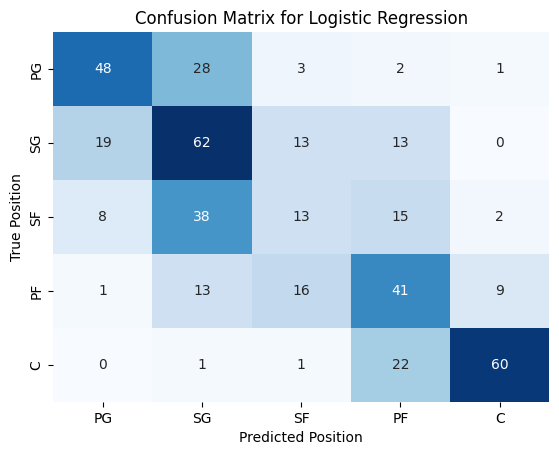

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=position_map.keys(),yticklabels=position_map.keys())
plt.xlabel('Predicted Position')
plt.ylabel('True Position')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

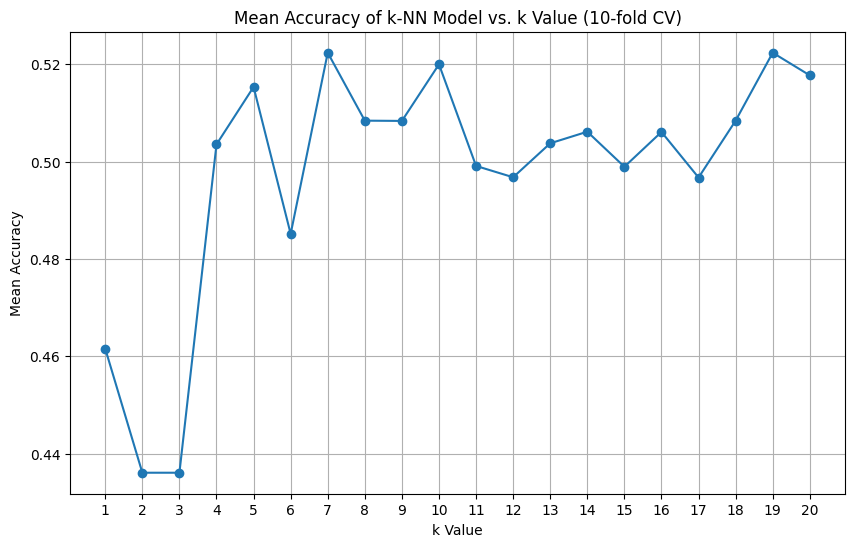

In [12]:
import numpy as np
k_values = list(range(1, 21))  
mean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    accuracies = cross_val_score(knn, X, y, cv=10)
    
    mean_accuracy = np.mean(accuracies)
    
    mean_accuracies.append(mean_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-')
plt.title('Mean Accuracy of k-NN Model vs. k Value (10-fold CV)')
plt.xlabel('k Value')
plt.ylabel('Mean Accuracy')
plt.xticks(np.arange(1, 21, step=1))  
plt.grid(True)
plt.show()

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(model, X, y, cv=loo)

mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.5337995337995338
[0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1